[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/data-science-workshop-2021/blob/main/99--exercises/40--spark.ipynb)

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz -O spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [1]:
!pip install -q pyspark findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Test it")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
sc = spark.sparkContext

In [4]:
from pyspark.sql import SparkSession
 
df_list = [('Polska', 'Warszawa', 1),
           ('Polska', 'Kraków', 2),
           ('Niemcy', 'Berlin', 1),
           ('Niemcy', 'Hamburg', 3),
           ('Czechy', 'Praga', 1),
           ('Rosja', 'Moskwa', 1),
           ('Francja', 'Lyon', 4)]
 
df = spark.createDataFrame(df_list, ['kraj', 'miasto', 'liczba'])
df.show()

+-------+--------+------+
|   kraj|  miasto|liczba|
+-------+--------+------+
| Polska|Warszawa|     1|
| Polska|  Kraków|     2|
| Niemcy|  Berlin|     1|
| Niemcy| Hamburg|     3|
| Czechy|   Praga|     1|
|  Rosja|  Moskwa|     1|
|Francja|    Lyon|     4|
+-------+--------+------+



# select

In [5]:
df.select(['kraj', 'miasto']).show()

+-------+--------+
|   kraj|  miasto|
+-------+--------+
| Polska|Warszawa|
| Polska|  Kraków|
| Niemcy|  Berlin|
| Niemcy| Hamburg|
| Czechy|   Praga|
|  Rosja|  Moskwa|
|Francja|    Lyon|
+-------+--------+



# where

In [6]:
df.filter(df['liczba'] > 1).show()

+-------+-------+------+
|   kraj| miasto|liczba|
+-------+-------+------+
| Polska| Kraków|     2|
| Niemcy|Hamburg|     3|
|Francja|   Lyon|     4|
+-------+-------+------+



In [7]:
df.where(df['liczba'] > 1).show()

+-------+-------+------+
|   kraj| miasto|liczba|
+-------+-------+------+
| Polska| Kraków|     2|
| Niemcy|Hamburg|     3|
|Francja|   Lyon|     4|
+-------+-------+------+



In [8]:
df.filter('(liczba > 1) AND (kraj != "Polska")').show()

+-------+-------+------+
|   kraj| miasto|liczba|
+-------+-------+------+
| Niemcy|Hamburg|     3|
|Francja|   Lyon|     4|
+-------+-------+------+



# sort

In [9]:
df.sort('kraj').show()

+-------+--------+------+
|   kraj|  miasto|liczba|
+-------+--------+------+
| Czechy|   Praga|     1|
|Francja|    Lyon|     4|
| Niemcy|  Berlin|     1|
| Niemcy| Hamburg|     3|
| Polska|Warszawa|     1|
| Polska|  Kraków|     2|
|  Rosja|  Moskwa|     1|
+-------+--------+------+



In [10]:
from pyspark.sql.functions import *

In [11]:
df.sort(desc('kraj')).show()

+-------+--------+------+
|   kraj|  miasto|liczba|
+-------+--------+------+
|  Rosja|  Moskwa|     1|
| Polska|Warszawa|     1|
| Polska|  Kraków|     2|
| Niemcy| Hamburg|     3|
| Niemcy|  Berlin|     1|
|Francja|    Lyon|     4|
| Czechy|   Praga|     1|
+-------+--------+------+



In [12]:
df.sort(desc('kraj'), 'miasto').show()

+-------+--------+------+
|   kraj|  miasto|liczba|
+-------+--------+------+
|  Rosja|  Moskwa|     1|
| Polska|  Kraków|     2|
| Polska|Warszawa|     1|
| Niemcy|  Berlin|     1|
| Niemcy| Hamburg|     3|
|Francja|    Lyon|     4|
| Czechy|   Praga|     1|
+-------+--------+------+



# groupBy

In [13]:
df.groupby('kraj').agg({"liczba": 'mean'}).show()

+-------+-----------+
|   kraj|avg(liczba)|
+-------+-----------+
|  Rosja|        1.0|
|Francja|        4.0|
| Czechy|        1.0|
| Niemcy|        2.0|
| Polska|        1.5|
+-------+-----------+



https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#module-pyspark.sql.functions

In [14]:
from pyspark.sql import functions as F

In [15]:
df.groupby('kraj')\
    .agg(
        F.min('liczba').alias('minimum'),
        F.max('liczba').alias('max'),
        F.avg('liczba').alias('avg'),
        F.sum('liczba').alias('sum'),
    ).show()

+-------+-------+---+---+---+
|   kraj|minimum|max|avg|sum|
+-------+-------+---+---+---+
|  Rosja|      1|  1|1.0|  1|
|Francja|      4|  4|4.0|  4|
| Czechy|      1|  1|1.0|  1|
| Niemcy|      1|  3|2.0|  4|
| Polska|      1|  2|1.5|  3|
+-------+-------+---+---+---+



In [16]:
df.groupby('kraj', 'miasto')\
    .agg(
        F.min('liczba').alias('minimum'),
        F.max('liczba').alias('max'),
        F.avg('liczba').alias('avg'),
        F.sum('liczba').alias('sum'),
    ).sort(F.desc('sum'), F.desc('kraj')).show()

+-------+--------+-------+---+---+---+
|   kraj|  miasto|minimum|max|avg|sum|
+-------+--------+-------+---+---+---+
|Francja|    Lyon|      4|  4|4.0|  4|
| Niemcy| Hamburg|      3|  3|3.0|  3|
| Polska|  Kraków|      2|  2|2.0|  2|
|  Rosja|  Moskwa|      1|  1|1.0|  1|
| Polska|Warszawa|      1|  1|1.0|  1|
| Niemcy|  Berlin|      1|  1|1.0|  1|
| Czechy|   Praga|      1|  1|1.0|  1|
+-------+--------+-------+---+---+---+



# SQL

In [17]:
df_sql = df.createOrReplaceTempView("dane")

In [18]:
sql_results = spark.sql("SELECT * FROM dane")

In [19]:
type(sql_results)

pyspark.sql.dataframe.DataFrame

In [20]:
sql_results.show()

+-------+--------+------+
|   kraj|  miasto|liczba|
+-------+--------+------+
| Polska|Warszawa|     1|
| Polska|  Kraków|     2|
| Niemcy|  Berlin|     1|
| Niemcy| Hamburg|     3|
| Czechy|   Praga|     1|
|  Rosja|  Moskwa|     1|
|Francja|    Lyon|     4|
+-------+--------+------+



In [21]:
spark.sql("SELECT kraj, COUNT(*) AS liczba_miast FROM dane GROUP BY kraj").show()

+-------+------------+
|   kraj|liczba_miast|
+-------+------------+
|  Rosja|           1|
|Francja|           1|
| Czechy|           1|
| Niemcy|           2|
| Polska|           2|
+-------+------------+



In [22]:
cities_count = spark\
    .sql("SELECT kraj, COUNT(*) AS liczba_miast FROM dane GROUP BY kraj") \
    .toPandas()

In [23]:
type(cities_count)

pandas.core.frame.DataFrame

In [24]:
cities_count.set_index(['kraj'], inplace=True)

In [25]:
cities_count

,liczba_miast
kraj,
Rosja,1
Francja,1
Czechy,1
Niemcy,2
Polska,2


<AxesSubplot:xlabel='kraj'>

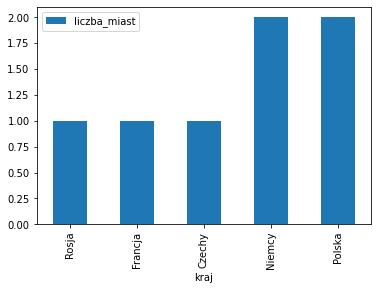

In [26]:
cities_count.plot.bar()

In [27]:
sc.stop()